Anotaciones de tipos

Python es un lenguaje de tipos dinámicos. Esto significa que en general no
le importan los tipos de objetos que utilicemos, siempre que lo hagamos de
formas válidas:


In [ ]:
def add(a, b):
    return a + b
assert add(10, 5) == 15, "+ is valid for numbers"
assert add([1, 2], [3]) == [1, 2, 3], "+ is valid for lists"
assert add("hi ", "there") == "hi there", "+ is valid for strings"
try:
    add(10, "five")
except TypeError:
    print("cannot add an int to a string")


Mientras que en un lenguaje de tipos estáticos nuestras funciones y
objetos tendrían tipos específicos:


In [ ]:
def add(a: int, b: int) -> int:
    return a + b
add(10, 5) # le gustaría que esto fuera correcto
add("hi ", "there") # le gustaría que esto no fuera correcto


En realidad, las versiones más recientes de Python tienen (más o menos)
esta funcionalidad. ¡La versión anterior de add con las anotaciones de tipos
int es válida en Python 3.6! Sin embargo, estas anotaciones de tipos no
hacen realmente nada. Aún se puede utilizar la función anotada add para
añadir cadenas, y la llamada a add(10, “five”) seguirá levantando
exactamente el mismo TypeError.
Dicho esto, sigue habiendo (al menos) cuatro buenas razones para utilizar
anotaciones de tipos en el código Python que escribamos:
- ■ Los tipos son una forma importante de documentación. Esto es
doblemente cierto en un libro que utiliza código para enseñar
conceptos teóricos y matemáticos. Comparemos las siguientes dos líneas de función:


In [ ]:
def dot_product(x, y): ...
# aún no hemos definido Vector, pero imagínese que lo habíamos hecho
def dot_product(x: Vector, y: Vector) -> float: ...


Encuentro el segundo extremadamente más informativo; espero que
también se lo parezca (en este punto me he acostumbrado tanto a la
determinación de tipos que ahora sin ello encuentro Python difícil de
leer).
- ■ Hay herramientas externas (siendo la más popular mypy) que leerán el
código que escribamos, inspeccionarán las anotaciones de tipos y
ofrecerán errores de tipos antes siquiera de ejecutar el código. Por
ejemplo, si ejecutamos mypy en un archivo que contiene add(“hi
“,”there”), avisaría de lo siguiente:



error: Argument 1 to “add” has incompatible type “str”; expected “int”


Al igual que la prueba assert, esta es una buena forma de encontrar
errores en el código antes de ejecutarlo. La narración del libro no
implicará tal comprobación de tipo; sin embargo, ejecutaré una en
segundo plano, lo que me permitirá asegurarme de que el libro en sí es
correcto.
■ Tener que pensar en los tipos de nuestro código nos obliga a diseñar
funciones e interfaces más limpios:


In [ ]:
from typing import Union
def secretly_ugly_function(value, operation): ...
def ugly_function(value: int,
    operation: Union[str, int, float, bool]) -> int: ...


Aquí tenemos una función cuyo parámetro de operación puede ser un
string, un int, un float o un bool. Es muy probable que esta función sea
frágil y difícil de utilizar, pero aún queda más claro cuando los tipos resultan
explícitos. Hacer esto nos obligará a diseñar de un modo menos torpe, cosa
que nuestros usuarios nos agradecerán.
- ■ Utilizar tipos permite al editor que utilicemos ayudarnos con cosas
como autocompletar (véase la figura 2.1) y enfadarnos por los errores
de escritura.

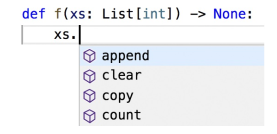

A veces, la gente insiste en que las comprobaciones de tipo pueden ser
valiosas en proyectos grandes, pero no merecen la pena en otros más
pequeños. No obstante, como casi no se tardan nada en escribir y permiten al
editor ahorrarnos tiempo, yo mantengo que de verdad permiten escribir
código con mayor rapidez, incluso en proyectos pequeños.
Por todas estas razones, todo el código del resto de este libro utilizará
anotaciones de tipos. Supongo que algunos lectores se sentirán desanimados
por utilizarlas, pero sospecho que al final del libro habrán cambiado de
opinión

**Cómo escribir anotaciones de tipos**

Como hemos visto, para tipos internos como int, bool y float basta con
utilizar el propio tipo como anotación. Pero ¿qué pasa si tenemos (por ejemplo) un list?


In [ ]:
def total(xs: list) -> float:
return sum(total)


Esto no es erróneo, pero el tipo no es lo bastante específico. Está claro que
realmente queremos que xs sea un list de valores float, no (por ejemplo)
un list de cadenas.
El módulo typing ofrece una serie de tipos parametrizados que podemos
utilizar para hacer precisamente esto:


In [ ]:
from typing import List # observe la L mayúscula
def total(xs: List[float]) -> float:
    return sum(total)


Hasta ahora hemos especificado solamente anotaciones para parámetros
de función y tipos de retorno. Para las propias variables suele ser obvio cuál
es el tipo:


In [ ]:
# Así es como se anota el tipo de variables cuando se definen.
# Pero esto es innecesario; es "obvio" que x es un int.
x: int = 5


No obstante, algunas veces no es obvio:


In [ ]:
values = [] # ¿cuál es mi tipo?
best_so_far = None # ¿cuál es mi tipo?


En estos casos suministraremos las comprobaciones de tipos inline:


In [ ]:
from typing import Optional
values: List[int] = []
best_so_far: Optional[float] = None # permitido ser un float o None


El módulo typing contiene muchos otros tipos, de los que solo
emplearemos unos pocos:


In [ ]:
# las anotaciones de tipo de este fragmento son todas innecesarias
from typing import Dict, Iterable, Tuple
# las claves son strings, los valores son ints
counts: Dict[str, int] = {'data': 1, 'science': 2}
# las listas y los generadores son ambos iterables
if lazy:
    evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
    evens = [0, 2, 4, 6, 8]
# las tuplas especifican un tipo para cada elemento
triple: Tuple[int, float, int] = (10, 2.3, 5)


Finalmente, como Python tiene funciones de primera clase, necesitamos
un tipo que las represente también. Este es un ejemplo bastante forzado:


In [ ]:
from typing import Callable
# La comprobación de tipos dice que el repetidor es una función que admite
# dos argumentos, un string y un int, y devuelve un string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
    return repeater(s, 2)
def comma_repeater(s: str, n: int) -> str:
    n_copies = [s for _ in range(n)]
    return ', '.join(n_copies)
assert twice(comma_repeater, "type hints") == "type hints, type hints"


Como las anotaciones de tipos son solo objetos Python, podemos
asignarles variables para que sea más fácil hacer referencia a ellos:


In [ ]:
Number = int
Numbers = List[Number]
def total(xs: Numbers) -> Number:
    return sum(xs)


Para cuando lleguemos al final del libro, el lector estará bastante
familiarizado con leer y escribir anotaciones de tipos, y espero que las utilice
en su código